In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
root = 'C:/Users/Admin/Dev1ce/Downloads/fer2013.csv/fer2013.csv'
data = pd.read_csv(root)

# Chuyển đổi dữ liệu trong cột 'pixels' thành danh sách các giá trị
pixels = data['pixels'].str.split(' ', expand=True)

# Đổi tên các cột của pixels thành 'pixel0', 'pixel1', ...
pixels.columns = [f'pixel{i}' for i in range(pixels.shape[1])]

# Lưu giá trị từng cột vào tập tin CSV
pixels.to_csv('pixels_processed.csv', index=False)

KeyboardInterrupt: 

In [ ]:
images = pd.read_csv('pixels_processed.csv').to_numpy()

In [ ]:
images_mean = np.mean(images, axis=0)
images_mean_centered = images - images_mean
cov = np.cov(images_mean_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
eigenvectors = eigenvectors.T
indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[indices]

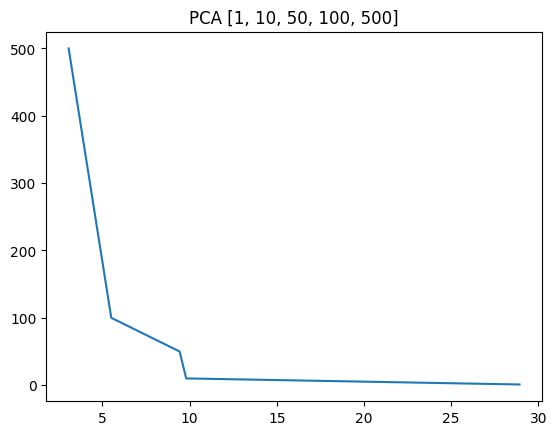

In [ ]:
# k = 1, 10, 50, 100, 500
k = 5
pve = eigenvalues / np.sum(eigenvalues)
pves_100 = pve[:k] * 100
k = [1, 10, 50, 100, 500]
plt.title("PCA " + str(k))
plt.plot(pves_100, k)

In [ ]:
# k = 1, 10, 50, 100, 500.
k = 500
pcas = eigenvectors[:k, :]
new_matrix = np.matmul(images[0], pcas.T)
image_rec = np.matmul(new_matrix, pcas) + images_mean
plt.imshow(image_rec.reshape(48, 48), 'gray')
plt.title("k = " + str(k))

NameError: name 'eigenvectors' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
dt = pd.read_csv(root)

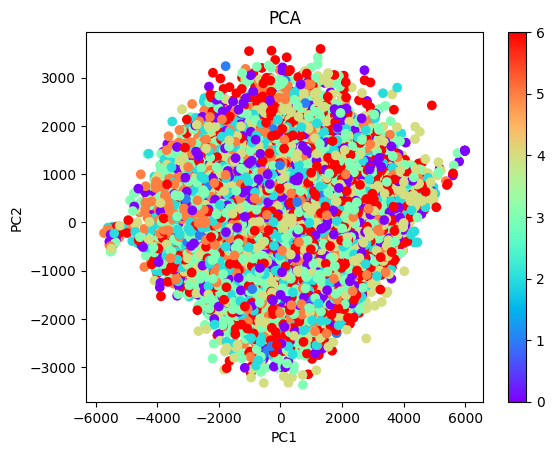

In [ ]:
# Chuyển đổi dữ liệu ảnh từ dạng chuỗi thành dạng mảng số
X = dt['pixels'].apply(lambda pixel_str: [int(pixel) for pixel in pixel_str.split()]).tolist()

# Áp dụng kỹ thuật PCA để giảm chiều dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tạo một DataFrame mới chứa dữ liệu giảm chiều và nhãn tương ứng
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['emotion'] = data['emotion']

# Biểu diễn dữ liệu giảm chiều bằng scatter plot
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['emotion'], cmap='rainbow')
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

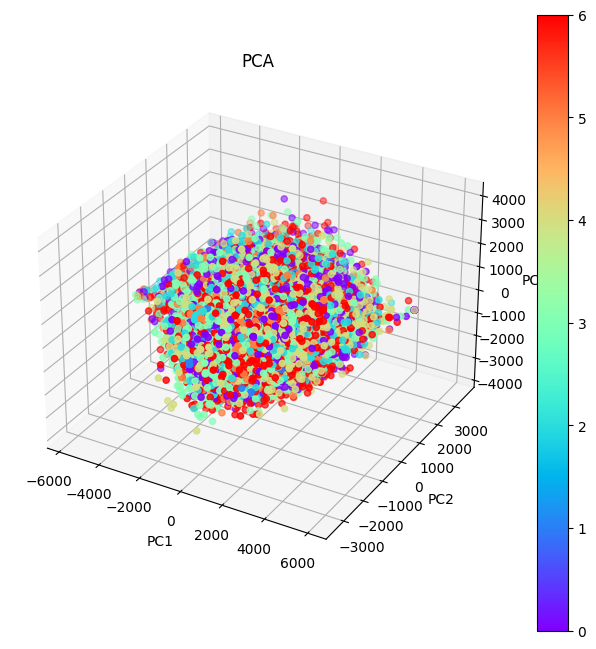

In [ ]:
# Áp dụng kỹ thuật PCA để giảm chiều dữ liệu xuống 3 chiều
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Tạo một DataFrame mới chứa dữ liệu giảm chiều và nhãn tương ứng
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['emotion'] = data['emotion']

# Biểu diễn dữ liệu giảm chiều bằng scatter plot 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['emotion'], cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA')
plt.colorbar(scatter)

plt.show()